In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ['OPENAI_API_KEY']=os.getenv("OPENAI_API_KEY")


In [2]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model = "gpt-5-nano-2025-08-07",reasoning_effort = "low")

In [4]:
llm.invoke("write a langchain tool to add to a llm in langchain so that it can find wheather in warangal just give me the code")

AIMessage(content='Here’s a minimal self-contained example of a LangChain tool that fetches the current weather for Warangal using the OpenWeatherMap API. Replace OPENWEATHER_API_KEY with your actual key (or set the OPENWEATHER_API_KEY environment variable).\n\n```python\n# warangal_weather_tool.py\n\nimport os\nimport requests\nfrom langchain.tools import BaseTool\n\nclass WarangalWeatherTool(BaseTool):\n    name = "warangal_weather"\n    description = (\n        "Returns the current weather for Warangal, Telangana, India using the OpenWeatherMap API. "\n        "Requires OPENWEATHER_API_KEY to be set in the environment."\n    )\n\n    def _call(self, input: str) -> str:\n        # Accepts optional query (e.g., city name), but we\'ll default to Warangal\n        city = (input or "Warangal").strip()\n\n        api_key = os.getenv("OPENWEATHER_API_KEY")\n        if not api_key:\n            return "Error: OPENWEATHER_API_KEY environment variable is not set."\n\n        # Use metric unit

In [3]:
print("""python\n# warangal_weather_tool.py\n\nimport os\nimport requests\nfrom langchain.tools import BaseTool\n\nclass WarangalWeatherTool(BaseTool):\n    name = "warangal_weather"\n    description = (\n        "Returns the current weather for Warangal, Telangana, India using the OpenWeatherMap API. "\n        "Requires OPENWEATHER_API_KEY to be set in the environment."\n    )\n\n    def _call(self, input: str) -> str:\n        # Accepts optional query (e.g., city name), but we\'ll default to Warangal\n        city = (input or "Warangal").strip()\n\n        api_key = os.getenv("OPENWEATHER_API_KEY")\n        if not api_key:\n            return "Error: OPENWEATHER_API_KEY environment variable is not set."\n\n        # Use metric units for Celsius\n        url = (\n            f"http://api.openweathermap.org/data/2.5/weather"\n            f"?q={city}&appid={api_key}&units=metric"\n        )\n\n        try:\n            resp = requests.get(url, timeout=5)\n        except Exception as e:\n            return f"Error while calling weather API: {e}"\n\n        if resp.status_code != 200:\n            try:\n                data = resp.json()\n                message = data.get("message", "Unknown error")\n            except Exception:\n                message = resp.text\n            return f"Weather API error ({resp.status_code}): {message}"\n\n        data = resp.json()\n        try:\n            weather_desc = data["weather"][0]["description"]\n            temp = data["main"]["temp"]\n            humidity = data["main"]["humidity"]\n            wind_speed = data["wind"]["speed"]\n            city_name = data.get("name", city)\n        except Exception as e:\n            return f"Error parsing weather data: {e}"\n\n        return (\n            f"Weather in {city_name}: {weather_desc}. "\n            f"Temperature {temp:.1f}°C, Humidity {humidity}%, Wind {wind_speed} m/s."\n        )\n\n# Example usage (to wire into a LangChain agent)\nif __name__ == "__main__":\n    # This block is for quick local testing; in a real app you would import WarangalWeatherTool\n    # and pass it to a LangChain agent along with its name/description.\n    tool = WarangalWeatherTool()\n    print(tool._call("Warangal"))\n```\n\nExample of wiring this tool into a LangChain agent (concise usage):\n\n```python\nfrom langchain.tools import Tool\nfrom langchain.llms import OpenAI\nfrom langchain.agents import initialize_agent, AgentType\nfrom warangal_weather_tool import WarangalWeatherTool\n\n# Prepare the tool\nweather_tool = WarangalWeatherTool()\nweather_tool_as_tool = Tool(\n    name=weather_tool.name,\n    func=weather_tool._call,\n    description=weather_tool.description\n)\n\n# Set up the LLM (ensure you have OPENAI_API_KEY or similar configured)\nllm = OpenAI(model="gpt-4", temperature=0.0)\n\n# Initialize an agent that can call the weather tool\nagent = initialize_agent(\n    tools=[weather_tool_as_tool],\n    llm=llm,\n    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,\n    verbose=True,\n)\n\n# Example prompt\nquery = "What\'s the current weather in Warangal?"\nresponse = agent.run(query)\nprint(response)\n```\n\nNotes:\n- Set your API key in the environment variable OPENWEATHER_API_KEY (or modify the code to read your key from another source).\n- The tool is designed to be plug-and-play with a LangChain agent; you can add other tools similarly and compose multi-tool workflows.""")

python
# warangal_weather_tool.py

import os
import requests
from langchain.tools import BaseTool

class WarangalWeatherTool(BaseTool):
    name = "warangal_weather"
    description = (
        "Returns the current weather for Warangal, Telangana, India using the OpenWeatherMap API. "
        "Requires OPENWEATHER_API_KEY to be set in the environment."
    )

    def _call(self, input: str) -> str:
        # Accepts optional query (e.g., city name), but we'll default to Warangal
        city = (input or "Warangal").strip()

        api_key = os.getenv("OPENWEATHER_API_KEY")
        if not api_key:
            return "Error: OPENWEATHER_API_KEY environment variable is not set."

        # Use metric units for Celsius
        url = (
            f"http://api.openweathermap.org/data/2.5/weather"
            f"?q={city}&appid={api_key}&units=metric"
        )

        try:
            resp = requests.get(url, timeout=5)
        except Exception as e:
            return f"Error while callin

In [ ]:
print("""python\n# warangal_weather_tool.py\n\nimport os\nimport requests\nfrom langchain.tools import BaseTool\n\nclass WarangalWeatherTool(BaseTool):\n    name = "warangal_weather"\n    description = (\n        "Returns the current weather for Warangal, Telangana, India using the OpenWeatherMap API. "\n        "Requires OPENWEATHER_API_KEY to be set in the environment."\n    )\n\n    def _call(self, input: str) -> str:\n        # Accepts optional query (e.g., city name), but we\'ll default to Warangal\n        city = (input or "Warangal").strip()\n\n        api_key = os.getenv("OPENWEATHER_API_KEY")\n        if not api_key:\n            return "Error: OPENWEATHER_API_KEY environment variable is not set."\n\n        # Use metric units for Celsius\n        url = (\n            f"http://api.openweathermap.org/data/2.5/weather"\n            f"?q={city}&appid={api_key}&units=metric"\n        )\n\n        try:\n            resp = requests.get(url, timeout=5)\n        except Exception as e:\n            return f"Error while calling weather API: {e}"\n\n        if resp.status_code != 200:\n            try:\n                data = resp.json()\n                message = data.get("message", "Unknown error")\n            except Exception:\n                message = resp.text\n            return f"Weather API error ({resp.status_code}): {message}"\n\n        data = resp.json()\n        try:\n            weather_desc = data["weather"][0]["description"]\n            temp = data["main"]["temp"]\n            humidity = data["main"]["humidity"]\n            wind_speed = data["wind"]["speed"]\n            city_name = data.get("name", city)\n        except Exception as e:\n            return f"Error parsing weather data: {e}"\n\n        return (\n            f"Weather in {city_name}: {weather_desc}. "\n            f"Temperature {temp:.1f}°C, Humidity {humidity}%, Wind {wind_speed} m/s."\n        )\n\n# Example usage (to wire into a LangChain agent)\nif __name__ == "__main__":\n    # This block is for quick local testing; in a real app you would import WarangalWeatherTool\n    # and pass it to a LangChain agent along with its name/description.\n    tool = WarangalWeatherTool()\n    print(tool._call("Warangal"))\n```\n\nExample of wiring this tool into a LangChain agent (concise usage):\n\n```python\nfrom langchain.tools import Tool\nfrom langchain.llms import OpenAI\nfrom langchain.agents import initialize_agent, AgentType\nfrom warangal_weather_tool import WarangalWeatherTool\n\n# Prepare the tool\nweather_tool = WarangalWeatherTool()\nweather_tool_as_tool = Tool(\n    name=weather_tool.name,\n    func=weather_tool._call,\n    description=weather_tool.description\n)\n\n# Set up the LLM (ensure you have OPENAI_API_KEY or similar configured)\nllm = OpenAI(model="gpt-4", temperature=0.0)\n\n# Initialize an agent that can call the weather tool\nagent = initialize_agent(\n    tools=[weather_tool_as_tool],\n    llm=llm,\n    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,\n    verbose=True,\n)\n\n# Example prompt\nquery = "What\'s the current weather in Warangal?"\nresponse = agent.run(query)\nprint(response)\n```\n\nNotes:\n- Set your API key in the environment variable OPENWEATHER_API_KEY (or modify the code to read your key from another source).\n- The tool is designed to be plug-and-play with a LangChain agent; you can add other tools similarly and compose multi-tool workflows.""")

In [4]:
import os
import json
from typing import TypedDict, Annotated, Literal
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from langchain_core.tools import tool
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver
import operator

# Load environment variables
load_dotenv()
api_key = os.getenv('OPENAI_API_KEY')

In [5]:
class WorkflowState(TypedDict):
    """State for the dynamic tool workflow."""
    messages: Annotated[list, operator.add]
    user_request: str
    tool_needed: bool
    tool_name: str
    tool_description: str
    tool_code: str
    tool_parameters: dict
    needs_api_key: bool
    api_key_name: str
    api_key_value: str
    tool_result: str
    final_response: str

# Global storage for dynamically created tools and API keys
dynamic_tools = {}
api_keys_storage = {}

In [6]:
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.7, api_key=api_key)
print("LLM initialized!")

LLM initialized!


In [ ]:
def analyze_request(state: WorkflowState) -> WorkflowState:
    """Analyze if the user request needs a tool."""
    user_request = state["user_request"]
    
    prompt = f"""Analyze this user request: "{user_request}"
    
Does this request require a tool/function to be created? Consider:
- API calls (weather, news, translations, etc.)
- Data processing or calculations
- External service interactions
- File operations

Respond ONLY with a JSON object:
{{
    "needs_tool": true/false,
    "tool_name": "descriptive_name" or null,
    "tool_description": "what the tool does" or null,
    "reasoning": "why it needs/doesn't need a tool"
}}"""
    
    response = llm.invoke([HumanMessage(content=prompt)])
    result = response.content.strip("`")
    result = json.loads(response.content)
    
    print(f"\n📋 Analysis: {result['reasoning']}")
    
    return {
        "messages": [AIMessage(content=f"Analysis: {result['reasoning']}")],
        "tool_needed": result["needs_tool"],
        "tool_name": result.get("tool_name", ""),
        "tool_description": result.get("tool_description", "")
    }

In [62]:
def generate_tool_code(state: WorkflowState) -> WorkflowState:
    """Generate Python code for the tool using LLM."""
    tool_name = state["tool_name"]
    tool_description = state["tool_description"]
    user_request = state["user_request"]
    print("\n------\n")
    print(tool_name,tool_description,user_request)
    print("\n-------\n")
    prompt = f"""Create a Python function for this tool:

Tool Name: {tool_name}
Description: {tool_description}
User Request: {user_request}

Requirements:
1. Create a complete, working Python function
2. Include proper error handling
3. Add type hints
4. If it needs an API key, use a parameter for it
5. Return results as a string

Respond with a JSON object:
{{
    "code": "def function_name(param1: type, param2: type) -> str:\n    # code here",
    "needs_api_key": true/false,
    "api_key_name": "API_KEY_NAME" or null,
    "parameters": {{"param1": "description", "param2": "description"}},
    "example_usage": "function_name('value1', 'value2')"
}}

For API calls, you can use requests library. Make the code practical and working."""
    
    response = llm.invoke([HumanMessage(content=prompt)])
    response = response.content.strip("`")[4:]
    result = json.loads(response)
    
    print(f"\n🔧 Generated tool: {tool_name}")
    print(f"Code:\n{result['code']}")
    
    return {
        "messages": [AIMessage(content=f"Generated tool code for {tool_name}")],
        "tool_code": result["code"],
        "needs_api_key": result["needs_api_key"],
        "api_key_name": result.get("api_key_name", ""),
        "tool_parameters": result["parameters"]
    }

In [63]:
def request_api_key(state: WorkflowState) -> WorkflowState:
    """Request API key from human if needed."""
    api_key_name = state["api_key_name"]
    
    # Check if we already have this API key
    if api_key_name in api_keys_storage:
        print(f"\n✅ Using existing API key for {api_key_name}")
        return {"api_key_value": api_keys_storage[api_key_name]}
    
    # Request from human
    print(f"\n🔑 HUMAN FEEDBACK NEEDED: Please provide your {api_key_name}")
    print(f"This is required for the tool to work properly.")
    
    # In notebook, we'll simulate this with input
    # In production, this could be a form, UI prompt, etc.
    api_key_value = input(f"Enter {api_key_name} (or 'skip' to use mock data): ")
    
    if api_key_value.lower() != 'skip':
        api_keys_storage[api_key_name] = api_key_value
        print(f"✅ API key stored securely!")
    else:
        api_key_value = "MOCK_API_KEY"
        print(f"⚠️ Using mock API key - tool may not work with real data")
    
    return {
        "messages": [HumanMessage(content=f"Provided {api_key_name}")],
        "api_key_value": api_key_value
    }

In [64]:
def execute_tool(state: WorkflowState) -> WorkflowState:
    """Execute the dynamically created tool."""
    tool_name = state["tool_name"]
    tool_code = state["tool_code"]
    user_request = state["user_request"]
    api_key_value = state.get("api_key_value", "")
    
    print(f"\n⚙️ Executing tool: {tool_name}")
    
    # Create a namespace for execution
    namespace = {"requests": None, "json": json, "os": os}
    
    try:
        # Try to import requests if needed
        import requests
        namespace["requests"] = requests
    except ImportError:
        print("⚠️ requests library not available")
    
    # Execute the generated code
    try:
        exec(tool_code, namespace)
        
        # Get the function name from the code
        function_name = tool_code.split("def ")[1].split("(")[0].strip()
        tool_function = namespace[function_name]
        
        # Store the tool for future use
        dynamic_tools[tool_name] = tool_function
        
        # Use LLM to determine parameters from user request
        param_prompt = f"""Extract the parameters needed to call this function from the user request.
        
User request: {user_request}
Function signature: {tool_code.split('->')[0]}
Parameters description: {state['tool_parameters']}

Return a JSON object with the parameter values:
{{
    "param_name": "value"
}}

If API key is needed, include it as well."""
        
        param_response = llm.invoke([HumanMessage(content=param_prompt)])
        params = json.loads(param_response.content)
        
        # Add API key if needed
        if state.get("needs_api_key"):
            params["api_key"] = api_key_value
        
        print(f"Parameters: {params}")
        
        # Execute the function
        result = tool_function(**params)
        
        print(f"✅ Result: {result}")
        
        return {
            "messages": [AIMessage(content=f"Executed {tool_name}")],
            "tool_result": str(result)
        }
        
    except Exception as e:
        error_msg = f"Error executing tool: {str(e)}"
        print(f"❌ {error_msg}")
        return {
            "messages": [AIMessage(content=error_msg)],
            "tool_result": error_msg
        }

In [65]:
def generate_response(state: WorkflowState) -> WorkflowState:
    """Generate final response to user."""
    user_request = state["user_request"]
    tool_result = state.get("tool_result", "")
    
    if state["tool_needed"] and tool_result:
        prompt = f"""User asked: {user_request}
        
Tool execution result: {tool_result}

Provide a natural, helpful response to the user based on this result."""
    else:
        prompt = user_request
    
    response = llm.invoke([HumanMessage(content=prompt)])
    final_response = response.content
    
    print(f"\n💬 Final Response: {final_response}")
    
    return {
        "messages": [AIMessage(content=final_response)],
        "final_response": final_response
    }

In [66]:
def route_after_analysis(state: WorkflowState) -> Literal["generate_tool_code", "generate_response"]:
    """Route based on whether a tool is needed."""
    if state["tool_needed"]:
        return "generate_tool_code"
    return "generate_response"

def route_after_code_gen(state: WorkflowState) -> Literal["request_api_key", "execute_tool"]:
    """Route based on whether an API key is needed."""
    if state["needs_api_key"]:
        return "request_api_key"
    return "execute_tool"

In [67]:
# Create the graph
workflow = StateGraph(WorkflowState)

# Add nodes
workflow.add_node("analyze_request", analyze_request)
workflow.add_node("generate_tool_code", generate_tool_code)
workflow.add_node("request_api_key", request_api_key)
workflow.add_node("execute_tool", execute_tool)
workflow.add_node("generate_response", generate_response)

# Add edges
workflow.add_edge(START, "analyze_request")
workflow.add_conditional_edges(
    "analyze_request",
    route_after_analysis,
    {
        "generate_tool_code": "generate_tool_code",
        "generate_response": "generate_response"
    }
)
workflow.add_conditional_edges(
    "generate_tool_code",
    route_after_code_gen,
    {
        "request_api_key": "request_api_key",
        "execute_tool": "execute_tool"
    }
)
workflow.add_edge("request_api_key", "execute_tool")
workflow.add_edge("execute_tool", "generate_response")
workflow.add_edge("generate_response", END)

# Compile
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

print("\n✅ Dynamic Tool Workflow Created!")
print("\nWorkflow: START → Analyze → [Generate Tool → Request API Key? → Execute Tool] → Response → END")


✅ Dynamic Tool Workflow Created!

Workflow: START → Analyze → [Generate Tool → Request API Key? → Execute Tool] → Response → END


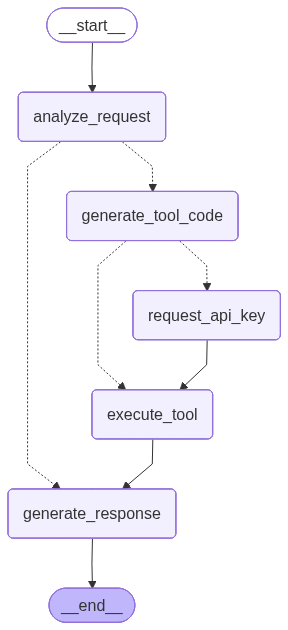

In [68]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [69]:
def run_workflow(user_request: str, thread_id: str = "1"):
    """Run the dynamic tool workflow."""
    print(f"\n{'='*60}")
    print(f"🚀 USER REQUEST: {user_request}")
    print(f"{'='*60}")
    
    config = {"configurable": {"thread_id": thread_id}}
    
    initial_state = {
        "messages": [],
        "user_request": user_request,
        "tool_needed": False,
        "tool_name": "",
        "tool_description": "",
        "tool_code": "",
        "tool_parameters": {},
        "needs_api_key": False,
        "api_key_name": "",
        "api_key_value": "",
        "tool_result": "",
        "final_response": ""
    }
    
    result = app.invoke(initial_state, config=config)
    
    print(f"\n{'='*60}")
    print(f"✨ WORKFLOW COMPLETE")
    print(f"{'='*60}\n")
    
    return result["final_response"]

In [70]:
# Test 1: Simple question (no tool needed)
response1 = run_workflow("What is the capital of France?")


🚀 USER REQUEST: What is the capital of France?

📋 Analysis: The request can be answered with existing knowledge and does not require any external data or functionality.

💬 Final Response: The capital of France is Paris.

✨ WORKFLOW COMPLETE



In [71]:
# Test 2: Request that needs a tool (weather - simulated)
response2 = run_workflow("create a file named abc.txt")



🚀 USER REQUEST: create a file named abc.txt

📋 Analysis: The request involves performing a file operation, specifically creating a new text file named 'abc.txt', which requires a specific function or tool to handle file system interactions.

------

File Creation Tool A tool that allows the creation of files with specified names and formats. create a file named abc.txt

-------


🔧 Generated tool: File Creation Tool
Code:
def create_file(file_name: str, api_key: str = None) -> str:
    try:
        # Check if the file name has a valid extension
        if not file_name.endswith('.txt'):
            return 'Error: Please provide a valid .txt file name.'

        # Create the file
        with open(file_name, 'w') as file:
            file.write('')  # Create an empty file

        return f'File "{file_name}" created successfully.'
    except IOError as e:
        return f'Error: Unable to create file. {str(e)}'

⚙️ Executing tool: File Creation Tool
❌ Error executing tool: Expecting va

In [59]:
content = """```json\n{\n    "code": "import os\\n\\n\\ndef file_creation_tool(file_name: str, api_key: str = \'\') -> str:\\n    try:\\n        # Check for file extension\\n        if not file_name.endswith(\'.txt\'):\\n            return \'Error: The file must have a .txt extension.\'\\n\\n        # Create the file\\n        with open(file_name, \'w\') as file:\\n            file.write(\'\')  # Create an empty file\\n\\n        return f\'File \\"{file_name}\\" created successfully.\'\\n    except Exception as e:\\n        return f\'An error occurred: {e}\'",\n    "needs_api_key": false,\n    "api_key_name": null,\n    "parameters": {"file_name": "The name of the file to create (must end with .txt)", "api_key": "Optional API key for additional features"},\n    "example_usage": "file_creation_tool(\'abc.txt\')"\n}\n```"""

In [61]:
content.strip("`")[4:]

'\n{\n    "code": "import os\\n\\n\\ndef file_creation_tool(file_name: str, api_key: str = \'\') -> str:\\n    try:\\n        # Check for file extension\\n        if not file_name.endswith(\'.txt\'):\\n            return \'Error: The file must have a .txt extension.\'\\n\\n        # Create the file\\n        with open(file_name, \'w\') as file:\\n            file.write(\'\')  # Create an empty file\\n\\n        return f\'File \\"{file_name}\\" created successfully.\'\\n    except Exception as e:\\n        return f\'An error occurred: {e}\'",\n    "needs_api_key": false,\n    "api_key_name": null,\n    "parameters": {"file_name": "The name of the file to create (must end with .txt)", "api_key": "Optional API key for additional features"},\n    "example_usage": "file_creation_tool(\'abc.txt\')"\n}\n'

In [55]:
result = json.loads(content)

In [58]:
print(result['code'])

import os


def file_creation_tool(file_name: str, api_key: str = '') -> str:
    try:
        # Check for file extension
        if not file_name.endswith('.txt'):
            return 'Error: The file must have a .txt extension.'

        # Create the file
        with open(file_name, 'w') as file:
            file.write('')  # Create an empty file

        return f'File "{file_name}" created successfully.'
    except Exception as e:
        return f'An error occurred: {e}'
